In [2]:
import pandas as pd,seaborn as sns, numpy as np
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
data =  pd.read_csv('/kaggle/input/world-happiness/2019.csv')

In [4]:
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
GDP per capita,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
Social support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
Healthy life expectancy,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
Freedom to make life choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
Generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
Perceptions of corruption,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


In [14]:
data[data["Country or region"]=="Turkey"]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
78,79,Turkey,5.373,1.183,1.36,0.808,0.195,0.083,0.106


In [6]:
df = data.drop(["Country or region",'Overall rank'],axis=1)

In [36]:
df.corr()[(df.corr()<-0.6)|((df.corr()>0.6))].drop('Score',axis=1).drop('Score',axis=0)

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
GDP per capita,1.000000,0.754906,0.835462,NaN,NaN,NaN
Social support,0.754906,1.000000,0.719009,NaN,NaN,NaN
Healthy life expectancy,0.835462,0.719009,1.000000,NaN,NaN,NaN
Freedom to make life choices,NaN,NaN,NaN,1.0,NaN,NaN
Generosity,NaN,NaN,NaN,NaN,1.0,NaN
Perceptions of corruption,NaN,NaN,NaN,NaN,NaN,1.0


<AxesSubplot: xlabel='Overall rank', ylabel='Score'>

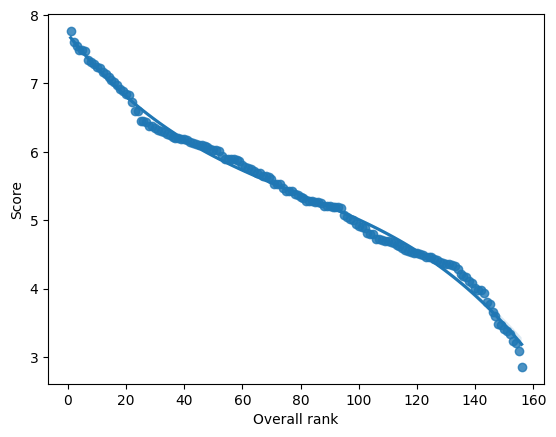

In [26]:
sns.regplot(data=df,x='Overall rank',y="Score",order=3)

In [7]:
df_ = df.astype(float)

In [8]:
#Variables

X = df_.drop('Score',axis=1)
y = df_.Score

In [9]:
#scale
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

# Model Creating

In [11]:
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from catboost import CatBoostRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor
from lightgbm import LGBMRegressor

In [46]:
models = dict(
    lasso_model = Lasso(alpha=0.01),
    ridge_model = Ridge(alpha=0.5),
    lr_model = LinearRegression(),
    cb_model = CatBoostRegressor(),
    bagging_model = BaggingRegressor(),
    rf_model = RandomForestRegressor(),
    lgbm_model = LGBMRegressor()
)

In [47]:
#fitting
for model in models.values():
    model.fit(x_train,y_train)

Learning rate set to 0.028846
0:	learn: 1.1369210	total: 653us	remaining: 653ms
1:	learn: 1.1169763	total: 1.57ms	remaining: 782ms
2:	learn: 1.0983795	total: 2.23ms	remaining: 743ms
3:	learn: 1.0798317	total: 2.86ms	remaining: 712ms
4:	learn: 1.0627439	total: 3.45ms	remaining: 687ms
5:	learn: 1.0467829	total: 4.1ms	remaining: 680ms
6:	learn: 1.0312796	total: 4.72ms	remaining: 670ms
7:	learn: 1.0132357	total: 5.32ms	remaining: 660ms
8:	learn: 0.9985627	total: 5.98ms	remaining: 658ms
9:	learn: 0.9827306	total: 6.59ms	remaining: 652ms
10:	learn: 0.9691614	total: 7.21ms	remaining: 648ms
11:	learn: 0.9541739	total: 7.82ms	remaining: 644ms
12:	learn: 0.9392355	total: 8.41ms	remaining: 638ms
13:	learn: 0.9251061	total: 9ms	remaining: 634ms
14:	learn: 0.9099103	total: 9.59ms	remaining: 630ms
15:	learn: 0.8961184	total: 10.2ms	remaining: 626ms
16:	learn: 0.8820819	total: 10.8ms	remaining: 625ms
17:	learn: 0.8696777	total: 11.4ms	remaining: 622ms
18:	learn: 0.8578264	total: 12ms	remaining: 622ms

In [48]:
#scorelar

for k,v in models.items():
    print("{} has score => {}".format(k,v.score(x_test,y_test)))

lasso_model has score => 0.6830249246858306
ridge_model has score => 0.6685515384031673
lr_model has score => 0.6486558559810548
cb_model has score => 0.6835834802468455
bagging_model has score => 0.7172391520939521
rf_model has score => 0.7467864607079815
lgbm_model has score => 0.664861661707609


In [53]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(models["rf_model"].predict(x_test),y_test)))
print(data.Score.mean())

0.5004179804179026
5.407096153846155


# Result

Random forest model is the best: 
- score: 0.75
- rmse: 0.5

But we can ofcourse make some tuning operations 